# Data Analist


> This is block for test

## Importing libraries

<!-- # sns.set_palette('tab10') -->


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py

# import ipywidgets as ipw


### Importing csv file

In [2]:
data = pd.read_excel('multiPages.xlsx')

save_path = 'D:/Users/HP/Desktop/Code Projects/GitHub/MAL-Top-Anime--Stats/Figures/'

## Feature Enginering

### Which year made the most top rated anime

This is for ALL data

In [ ]:
years = np.arange(197,203,1).tolist()

for year in years:
    patternY = str(year)

    yearMask = data['AirDate'].str.contains(patternY)
    anime_Year = (data[yearMask])

    print('Top animes in decade', patternY, '\b0 :' , len(anime_Year))

In [ ]:
infoMonth = []
# If not like this, its sorted alphabeticly[Apr-Sep]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

for month in months:
    patternM = (month)
    monthMask = data['AirDate'].str.contains(patternM)
    anime_Month = (data[monthMask])

    print('Number animes in', patternM,' :' ,len(anime_Month))
    # print(strMonth)
    infoMonth.append(anime_Month)   ## To find the dataframe acc. to month index

# (list(multiPage.AirDate.groupby(multiPage.AirDate.dt.year)))


---
------
## ____Only TV shows____


###  &emsp; Clean-up
<!-- > test -->

In [11]:
dataTV = data.loc[data.Type == 'TV'].copy()

In [ ]:
dataTV.columns

Formatting

In [12]:
# cols_org = ['Rank', 'Title', 'Rating', 'Type', 'AirDate', 'EndDate', 'TotalEpi',
#        'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
#        'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Source']



dataTV['AirDate_dt'] = pd.to_datetime(dataTV.AirDate, infer_datetime_format=True)
dataTV['EndDate_dt'] = pd.to_datetime(dataTV.EndDate, infer_datetime_format=True)


### ---Dropping unneeded coloms
dataTV = dataTV.drop(columns=['AirDate', 'EndDate'])

## Reorganizing coloms
dataTV = dataTV[['Rank', 'Title', 'Rating', 'Type', 'AirDate_dt', 'EndDate_dt', 'TotalEpi',
                'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
                'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Demograph', 'Themes',
                'Source']]



In [14]:
# Adding important Varibles

premaired_season_name = dataTV['Premiered'].str.split().str[0]
premaired_season_year = dataTV['Premiered'].str.split().str[1]


In [ ]:
# dataTV.info()

--------
------
### ___Released Stas___



#### &emsp; Premiered

##### &emsp; Monthly released
<!-- AirDates -->

In [16]:
# air_year = dataTV['AirDate_dt'].dt.year
# air_month = dataTV['AirDate_dt'].dt.month
# mont_count = air_month.value_counts().sort_index()

# # mont_count

In [49]:
airMonth_group = dataTV.groupby(dataTV['AirDate_dt'].dt.month)

airMonth_count = airMonth_group['AirDate_dt'].count()

airMonth_count.index = months

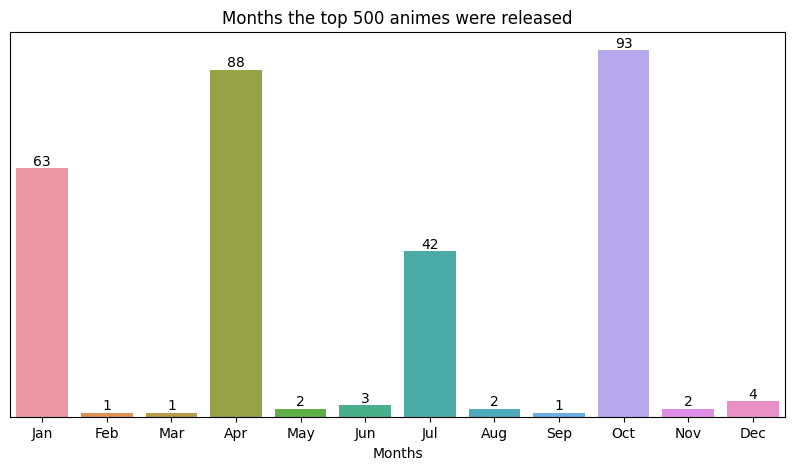

In [52]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']
plt.figure(figsize=(10,5))

ax = sns.barplot(x = airMonth_count.index,
                 y = airMonth_count.values
                )

ax.set_title('Months the top 500 animes were released')
ax.set_xlabel('Months')
ax.set_ylabel('')
ax.set_yticks([])

# ax.adjust()


for container in ax.containers:
    ax.bar_label(container)


plt.savefig(save_path + 'Releases/montly_releases.png',
            transparent = False,
            bbox_inches = 'tight'
            )

###### Draft and testing

In [31]:
# monthCount = dataTV.AirDate_dt.dt.month.value_counts().sort_index()

# j=0
# for i in monthCount:
#     months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']
#     print(f'Number anmies in {months[j]} : {i}')
#     j=j+1


# monthCount.plot(kind='bar',
#                 xlabel='Months', 
#                 ylabel='Counts',
            
#                 title='Months the top 500 animes were released',
#                 color = 'blue',
#                 # rot=90 ##Rotate x value names,
#                 figsize=(15,5)
#                   )

# dataTV.AirDate_dt.dt.year.value_counts().sort_index()
# plt.figure(figsize=(10,5))

#--------------------------------------------------------------

# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

# ax = sns.barplot(x = months,
#                  y = monthCount)

# ax.set_title('Months the top 500 animes were released')
# ax.set_xlabel('Months')
# ax.set_ylabel('')
# ax.set_yticks([])

# # ax.adjust()


# for container in ax.containers:
#     ax.bar_label(container)


# plt.savefig(save_path + 'Releases/montly_releases.png',
#             transparent = False,
#             bbox_inches = 'tight'
#             )

In [ ]:
dataTV['Aired_months'] = dataTV.AirDate_dt.dt.month

In [ ]:
dataTV.groupby('Aired_months')['Aired_months'].count().plot.bar(figsize = (15,5))

##### &emsp; Seasonly released

<!-- Premiered -->

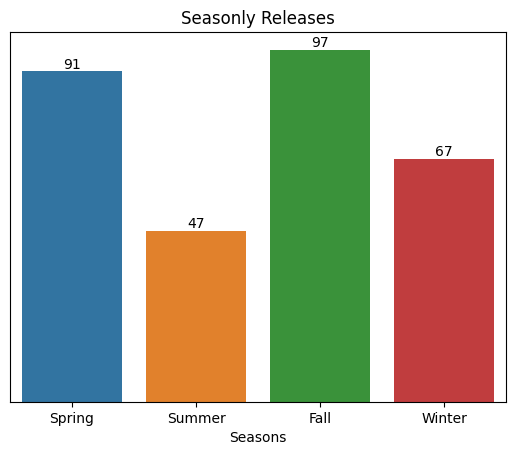

In [54]:
## Much cleaner

ax = sns.countplot(data = dataTV,
                   x = dataTV['Premiered'].str.split().str[0], ## TODO
                   order= ['Spring', 'Summer', 'Fall', 'Winter'])

ax.set(xlabel='Premiered Season')
# ax.


ax.set(title = 'Seasonly Releases',
       xlabel = 'Seasons', 
       ylabel = '')

ax.set_yticks([])

for container in ax.containers:
    ax.bar_label(container)


# path = 'D:/Users/HP/Desktop/Code Projects/GitHub/MAL-Top-Anime--Stats/Figures'
plt.savefig(save_path+'/Releases/season_releases.jpg',
            transparent = False,
            bbox_inches = 'tight'
            )

###### Other Season Count graph


In [36]:
dataTV['Premiered_Season'] =dataTV.Premiered.str.split(' ').str[0]

In [ ]:
# plt.figure(figsize=(15,5))

# plt.ion()

seasonGroup = dataTV.groupby('Premiered_Season')
season_count = seasonGroup['Premiered_Season'].count()

season_count = season_count.reindex(['Spring', 'Summer', 'Fall', 'Winter'])

# ax = season_count.plot.bar()
# ax.set_title('Seasonly Releases')

ax= sns.barplot(x = season_count.index,
                y = season_count.values) 

ax.set(title = 'Seasonly Releases',
       xlabel = 'Season')

ax.set_yticks([])

for container in ax.containers:
    ax.bar_label(container)



In [ ]:
# ### USE THIS WAY FROM NOW

# seasonsNew = dataTV.Premiered.str.split(' ').str[0].value_counts()

# print('Number animes in Fall:   ', seasonsNew[0])
# print('Number animes in Spring: ', seasonsNew[1])
# print('Number animes in Winter: ', seasonsNew[2])
# print('Number animes in Summer: ', seasonsNew[3])


# plt.barh(['Spring', 'Summer', 'Fall', 'Winter'], seasonsNew)
# plt.title('Amount of top animes for each Season')
# plt.ylabel('Total top animes released')

In [ ]:
grouped = dataTV.groupby(['Premiered_Season', 'Broadcast'])

# grouped.count()

##### &emsp; Yearly released for decade

<!-- Decades devide for each release -->

<!-- <br> - decades_data = dataTV.groupby((dataTV.AirDate_dt.dt.year//10)*10) -->


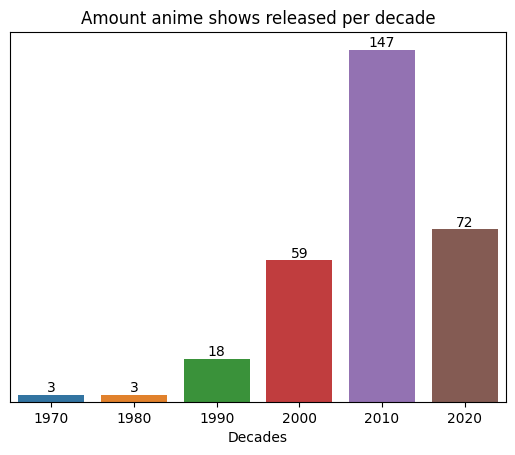

In [15]:
# plt.figure(figsize=(10,8))

decade = (dataTV.groupby(dataTV.AirDate_dt.dt.year//10)).count()
decade.index.name ='decades'

decade = decade.reset_index().assign(decades=decade.index*10).rename(columns={'AirDate_dt':'counts'})
decade = decade.rename(columns={'AirDate_dt':'Counts'})

# ax =  decade.plot.bar(x='decades', 
#                       y='counts',
#                       grid = False)
                    
# ax.set_ylabel('Counts')

ax = sns.barplot(x = decade.decades,
                 y = decade.Rank.values)


ax.set_title('Amount anime shows released per decade')
ax.set_xlabel('Decades')
ax.set_yticks([])


for container in ax.containers:
    ax.bar_label(container)

plt.savefig(save_path +'/Releases/decade_releases.png',
            transparent = False,
            bbox_inches = 'tight'
            )

#### &emsp; Broadcast

In [27]:
air_group = dataTV.groupby(dataTV['AirDate_dt'].dt.month)


air_group['AirDate_dt'].count()

AirDate_dt
1     63
2      1
3      1
4     88
5      2
6      3
7     42
8      2
9      1
10    93
11     2
12     4
Name: AirDate_dt, dtype: int64

#### &emsp; Studio

#### &emsp; Age Rating

#### &emsp; Genres

#### &emsp; Producers

#### &emsp; Demograph

#### &emsp; Themes

#### &emsp; Source

-------
*******
### ___Ratings Stats___

#### &emsp; Counts

#####  Seasonal Rating

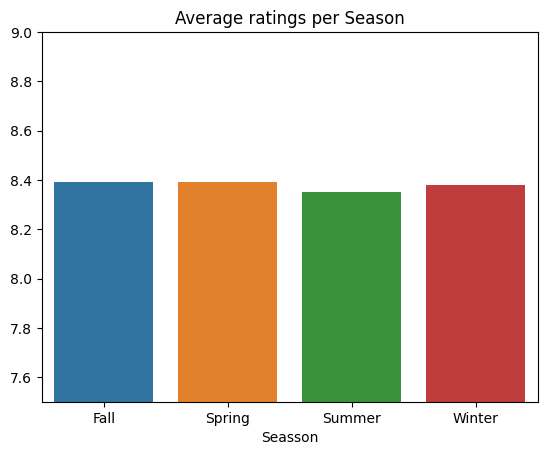

In [32]:
seasonal_rating = dataTV.groupby( dataTV['Premiered'].str.split().str[0] )['Rating']

seasonal_rating_avr = seasonal_rating.mean().round(2)

# ax = seasonal_rating_avr.plot.barh()
ax = sns.barplot(x = seasonal_rating_avr.index,
                y = seasonal_rating_avr.values)


ax.set_title('Average ratings per Season')
ax.set_ylabel(None)
ax.set_xlabel('Seasson')


## TODO: Make this an interative slide3r
ax.set_ylim(7.5 , 9)

plt.savefig(save_path + '/Ratings/avr_season_rating.png')





In [23]:
# # seasonal_rating_avr.values

# slider = ipw.IntSlider(    
#     value=7,
#     min=0,
#     max=10,
#     step=1,
#     description='Test:',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d'
#     )

# slider

##### Monthly Ratings

AirDate_dt
November     8.155000
March        8.190000
February     8.250000
September    8.290000
July         8.337857
January      8.372540
May          8.390000
April        8.395227
October      8.401613
June         8.410000
December     8.482500
August       8.510000
Name: Rating, dtype: float64

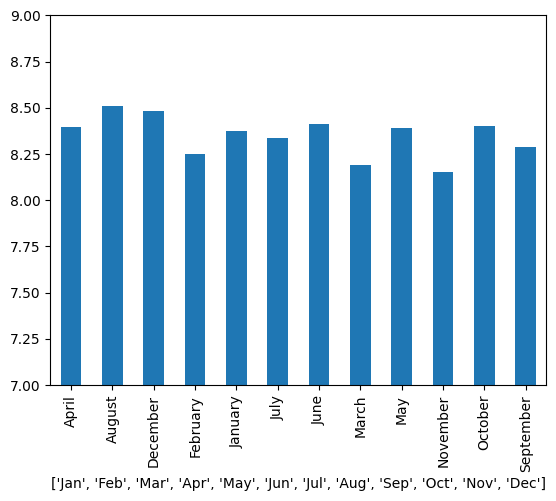

In [40]:
month_rating = dataTV.groupby(dataTV['AirDate_dt'].dt.month_name())['Rating']
# month_rating = dataTV.groupby('Aired_months')['Rating']
month_rating_mean = month_rating.mean()


# Creating and modifing plot
ax = month_rating_mean.plot.bar()
ax.set_xlabel(months)
ax.set_ylim(7,9)


# month_rating_mean = month_rating_mean.reset_index()


month_rating_mean.sort_values()

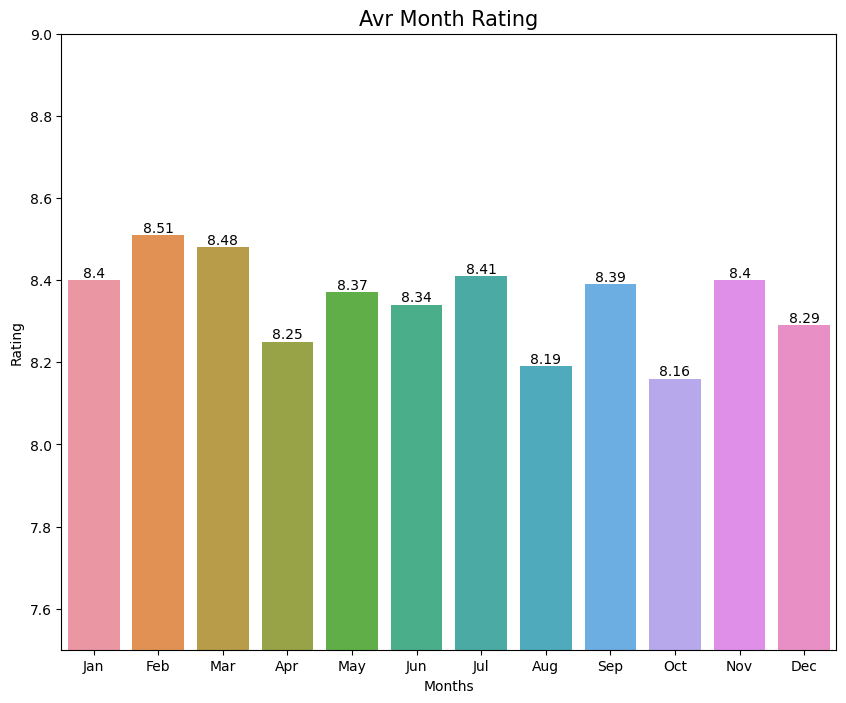

In [64]:
plt.figure(figsize=(10,8))

ting = dataTV.groupby(dataTV['AirDate_dt'].dt.month_name())['Rating']
month_rating_mean = month_rating.mean().round(2)

month_rating_mean.index = months

ax = sns.barplot(x=month_rating_mean.index,
                y=month_rating_mean)

ax.set_title('Avr Month Rating', fontsize = 15)
ax.set_xlabel('Months')    
ax.set_ylim(7.5,9)


for container in ax.containers:
    ax.bar_label(container)


plt.savefig(save_path+'/Ratings/avr_month_rating.png')

In [ ]:
# month_rating_mean.Aired_months

# month_rating_mean

In [ ]:
month_rating.get_group(2)

##### Yearly ratings

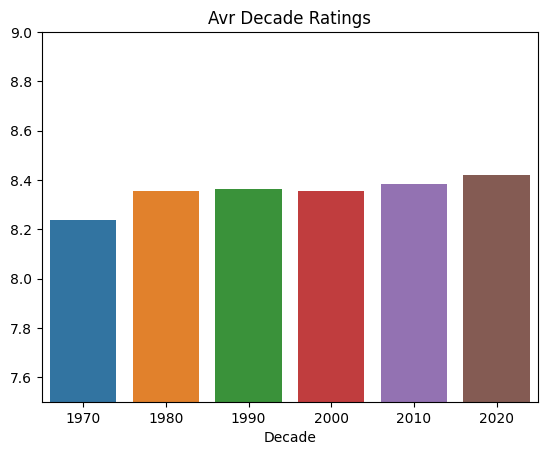

In [73]:
decades_data = dataTV.groupby((dataTV.AirDate_dt.dt.year//10)*10)

decade_mean = decades_data['Rating'].mean()

ax = sns.barplot(x = decade_mean.index,
                 y = decade_mean.values)

ax.set_title('Avr Decade Ratings')
ax.set_xlabel('Decade')

ax.set_ylim(7.5,9)


plt.savefig(save_path + '/Ratings/avr_decade.png')

In [ ]:
# dataTV.groupby(da)

In [ ]:
decade

#### &emsp; Premiered

#### &emsp; Studio

#### &emsp; Age Rating

#### &emsp; Genres

#### &emsp; Producers

#### &emsp; Demograph

#### &emsp; Themes

#### &emsp; Source

-------
*******
### ___Broadcasts Stats___

In [5]:
broadcast_group = dataTV.groupby(dataTV.Broadcast)

#### &emsp; Counts

##### Wekkly released counts

In [6]:
## Airing Days

dataTV.Broadcast.value_counts()

Sundays                          53
Saturdays                        49
Fridays                          44
Wednesdays                       36
Tuesdays                         35
Mondays                          30
Unknown\n                        29
Thursdays                        24
Not scheduled once per week\n     2
Name: Broadcast, dtype: int64

In [42]:
## Each weekday count
broadcast_count = broadcast_group['Broadcast'].count()

#Drop elements
# broadcast_count = broadcast_count.drop(['Not scheduled once per week\n', 'Unknown\n'])

# Reorder elements
date_order = ['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays', 'Saturdays', 'Sundays']
broadcast_count = broadcast_count.reindex(date_order)

In [ ]:
# ax = broadcast_count.plot.bar()

# ax.set_title('Weekly releases')
# ax.set_ylabel('Counts')

# pingi = sns.load_dataset('penguins')
# ax = sns.barplot(data=pingi, x = 'island', y='body_mass_g', hue='sex')

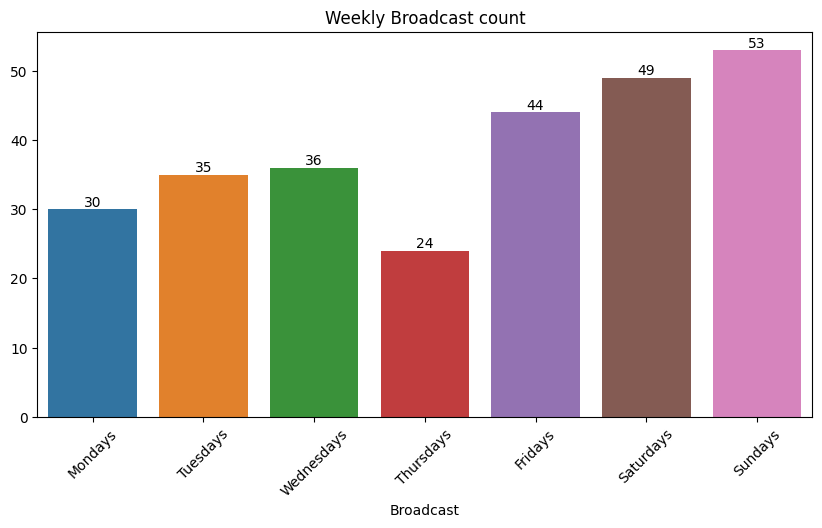

In [31]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x = broadcast_count.index,
                 y = broadcast_count.values
                 )

ax.set(title='Weekly Broadcast count')

ax.tick_params(axis='x',
               rotation = 45
               )



for container in ax.containers:
    ax.bar_label(container)


plt.savefig(save_path+'/Broadcast/weekday_count.jpg',
            transparent = False,
            bbox_inches = 'tight'
            )

In [ ]:
date_order = ['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays', 'Saturdays', 'Sundays']

ax = sns.catplot(data = dataTV,
                 x= 'Broadcast',
                 kind = 'count',
                 order= date_order,                
            )

ax.tick_params(axis='x',
              rotation = 45)

# for container in ax.containers:
#     ax.bar_label(container)

##### Seasonly

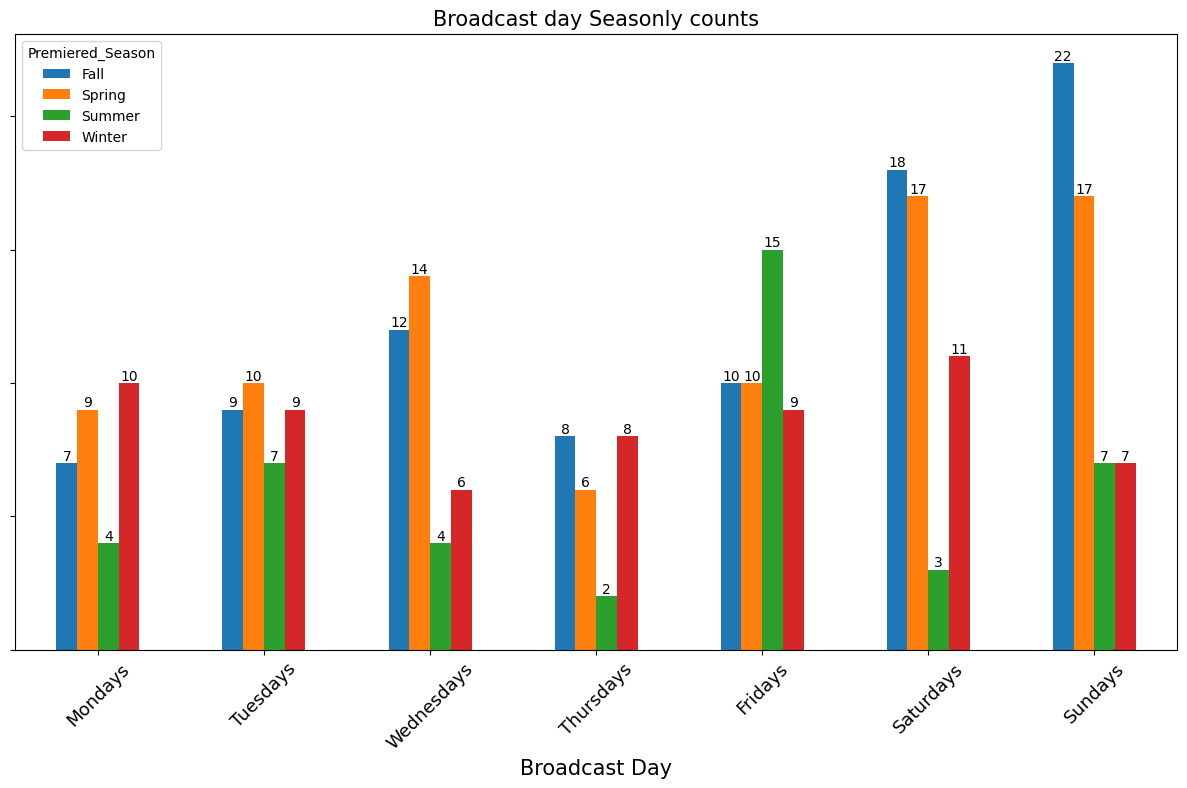

In [50]:
# %config InlineBackend.figure_format = 'retina'

# broadcast_group['Premiered_Season'].describe()
# broadcast_group['Premiered_Season'].value_counts().plot.bar(figsize = (15,5))
## TODO Check premaird season varible
ax = (broadcast_group['Premiered_Season'].value_counts()
                                    .unstack()
                                    .reindex(date_order)
                                    .plot.bar(figsize = (15,8), fontsize=13)
                                    )

ax.set_title('Broadcast day Seasonly counts', fontsize=15 )
ax.set_xlabel('Broadcast Day', fontsize = 15)
# ax.set_ylabel('Count',fontsize=15)

ax.set_yticklabels('')
       
ax.tick_params(axis = 'x', 
               rotation=45)

for container in ax.containers:
    ax.bar_label(container)


plt.savefig(save_path+'/Broadcast/season_count.jpg',
            transparent = False,
            bbox_inches = 'tight'
            )

In [ ]:
# sns.barplot()

In [ ]:
# sns.catplot(data = dataTV,
#             x = 'Premiered_Season',
#             col = 'Premiered_Season',
#             y='Broadcast',
#             kind = 'count')


# sns.catplot( x = season_count,
#             y = broadcast_count
#             )

#### &emsp; Sources

#### &emsp; Age Rating

#### &emsp; Genres

#### &emsp; Producers

#### &emsp; Demograph

#### &emsp; Themes

#### &emsp; Source

-----
-----
### ___Studios Stats___
<p> all studios below in comment</p>


<!-- # ['8bit', 'A-1 Pictures', 'A.C.G.T.', 'Ajia-do', 'Artland',
    # 'Bandai Namco Pictures', 'Bibury Animation Studios', 'Bones',
    # 'Brain's Base', 'C-Station', 'CloverWorks', 'David Production',
    # 'Gainax', 'Gallop', 'Geno Studio', 'Gonzo', 'Hal Film Maker', 'Imagin',
    # 'J.C.Staff', 'Kinema Citrus', 'Kyoto Animation', 'Lerche', 'MAPPA',
    # 'Madhouse', 'Manglobe', 'Mushi Production', 'Nexus', 'Nippon Animation',
    # 'OLM', 'Orange', 'P.A. Works', 'Pastel', 'Pierrot', 'Platinum Vision',
    # 'Production I.G', 'SILVER LINK.', 'Satelight', 'Science SARU', 'Shaft',
    # 'Shin-Ei Animation', 'Shuka', 'Studio Bind', 'Studio Deen',
    # 'Studio Hibari', 'Sunrise', 'SynergySP', 'TMS Entertainment', 'TROYCA',
    # 'Tatsunoko Production', 'Telecom Animation Film', 'Telescreen',
    # 'Tezuka Productions', 'Toei Animation', 'Tokyo Movie Shinsha',
    # 'Triangle Staff', 'White Fox', 'Wit Studio', 'Zero-G', 'feel.',
    # 'ufotable'] -->

In [53]:
# studi_count = dataTV.Studio.value_counts()

studio_group = dataTV.groupby('Studio')#.value_counts().plot.bar(figsize = (15,5))


In [88]:
studio_names = studio_group.first().index


len(studio_names)       ## There are 60 Studios

60

#### Counts

In [54]:
studio_count = studio_group['Studio'].count()
len(studio_count.values)

60

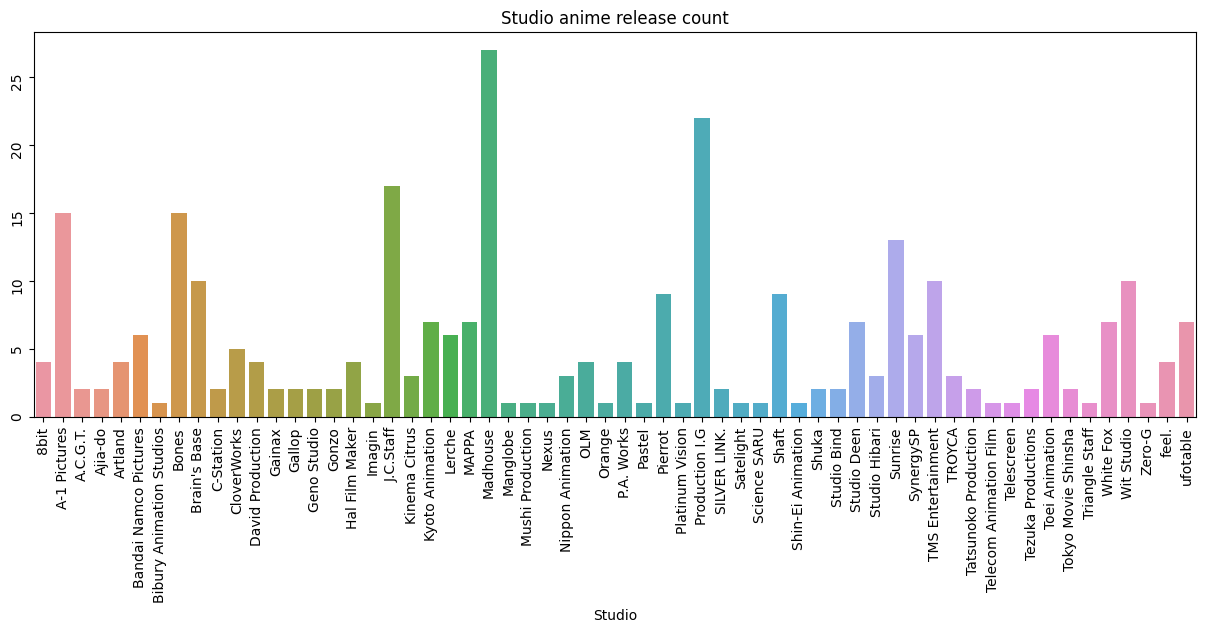

In [56]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x = studio_count.index,
                 y = studio_count.values)

ax.tick_params(rotation = 90)
ax.set_title('Studio anime release count')


plt.savefig(save_path+'/Studio/all_studio_count.png',
            transparent = False,
            bbox_inches = 'tight'
            )

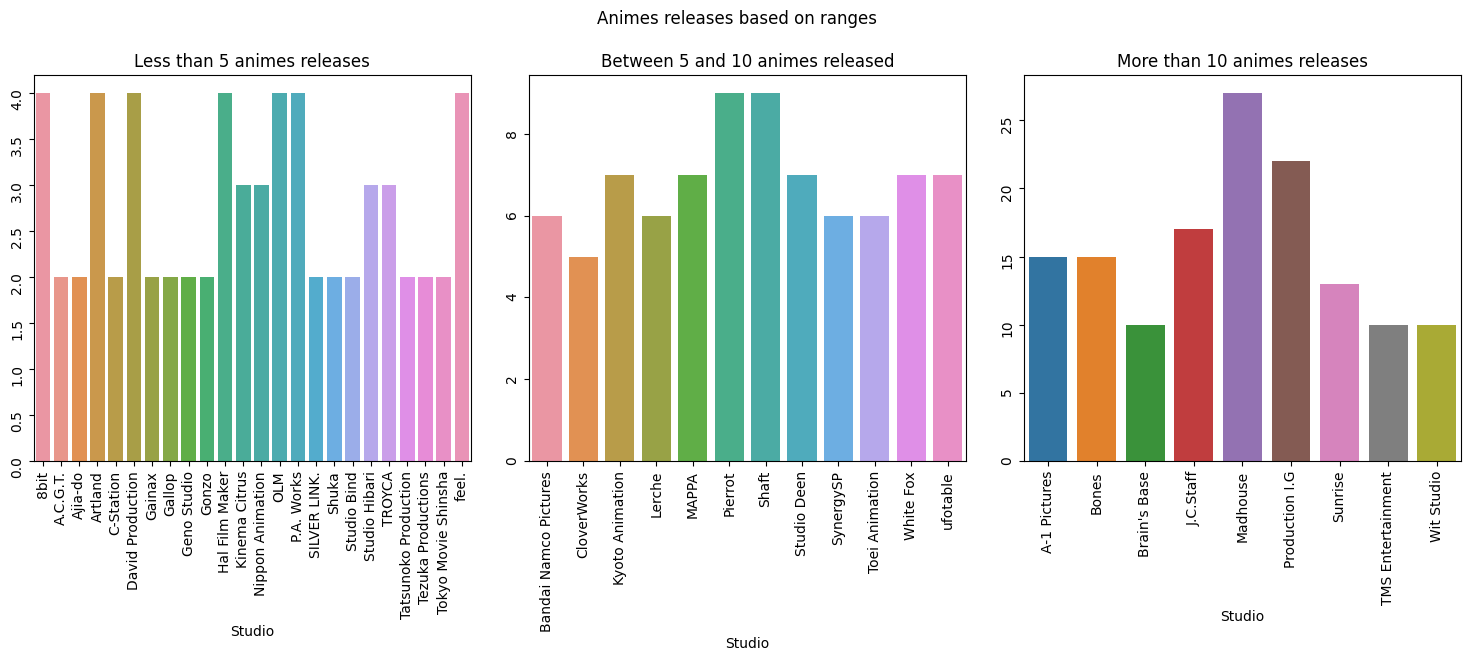

In [58]:
less_five = (studio_count.where((studio_count.values > 1) & (studio_count.values < 5))).dropna()
less_ten = (studio_count.where((studio_count.values > 4) & (studio_count.values < 10))).dropna()
more_ten = (studio_count.where(studio_count.values > 9)).dropna()


fig,ax = plt.subplots(1,3, figsize = (15,5))
fig.suptitle('Animes releases based on ranges')
fig.tight_layout(h_pad=15)
fig.subplots_adjust(top = .85)      # Header Size



sns.barplot(ax = ax[0],
            x = less_five.index,
            y = less_five.values
            )

sns.barplot(ax = ax[1],
            x = less_ten.index,
            y = less_ten.values
            )

sns.barplot(ax= ax[2],
            x = more_ten.index, 
            y = more_ten.values)


ax[0].set_title('Less than 5 animes releases')
ax[1].set_title('Between 5 and 10 animes released')
ax[2].set_title('More than 10 animes releases')


ax[0].tick_params(rotation = 90)
ax[1].tick_params(rotation = 90)
ax[2].tick_params(rotation = 90)

# less_ten.plot.bar()
# more_ten.plot.bar()


plt.savefig(save_path+'/Studio/range_releases.png',
            transparent = False,
            bbox_inches = 'tight'
            )

#### &emsp; Premiered

#### &emsp; Age Rating

#### &emsp; Genres

#### &emsp; Producers

#### &emsp; Demograph

#### &emsp; Themes

#### &emsp; Source

-----
----
### ___Age rating releases___

#### Age Ratings Counts

In [9]:
# dataTV['Age Ratingn'].value_counts().plot.bar()

# plt.title('Age Rating Counts')
# # plt.grid()

In [7]:
age_group = dataTV.groupby('Age Ratingn')['Age Ratingn']
age_count = age_group.count()

#### &emsp; Premiered

#### &emsp; Broadcast

#### &emsp; Studio Rating Releases

In [60]:
studio_group['Age Ratingn'].value_counts().unstack()#.plot.bar(figsize = (15,5))
# strudio_age = studio_group['Age Ratingn']


<Figure size 5000x500 with 0 Axes>

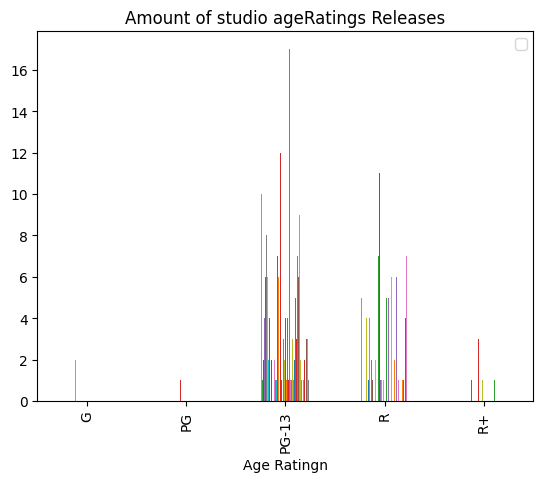

In [120]:
studio_age = studio_group['Age Ratingn'].value_counts()


sAge_count = studio_age.unstack(level=0)


plt.figure(figsize = (50,5))
ax = (studio_age.unstack(level=0)
            .plot.bar() 
            )

ax.legend("")
plt.title('Amount of studio ageRatings Releases')




plt.savefig(save_path+'/Age_ratings/ageRatingCount.png',
            transparent = False,
            bbox_inches = 'tight'
            )


In [105]:
# studio_age.index[0]

# sns.barplot(x = studio_age.index,
#             y = studio_age['Age Ratingn'].values)

('8bit', 'PG-13')

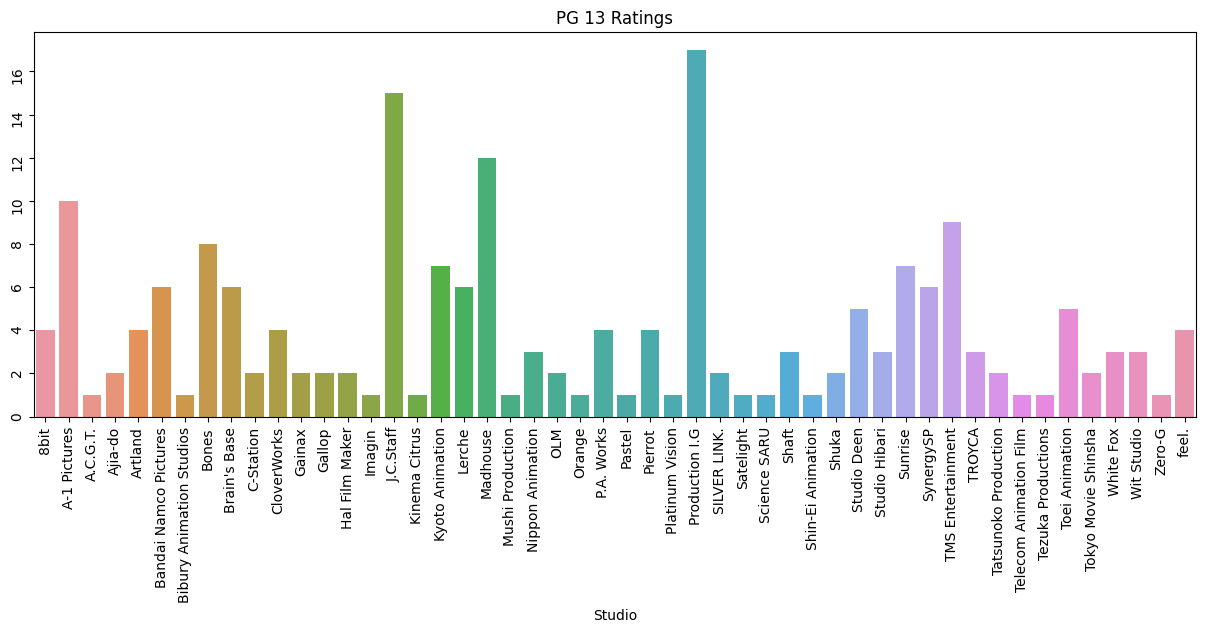

In [62]:
## Zoomed in graph of above

pg13_studios = strudio_age.unstack(level=1)['PG-13'].dropna()

# pg13_studios.plot.bar(figsize = (15,5))
plt.figure(figsize=(15,5))

ax = sns.barplot(x = pg13_studios.index,
                 y = pg13_studios.values)

ax.set_title('PG 13 Ratings')
ax.tick_params(rotation = 90)

In [64]:
g_studios = (strudio_age.unstack(level=1)['G'].dropna()).astype(int)
pg_studios = (strudio_age.unstack(level=1)['PG'].dropna()).astype(int)
pg13_studios = (strudio_age.unstack(level=1)['PG-13'].dropna()).astype(int)
r_studios = (strudio_age.unstack(level=1)['R'].dropna()).astype(int)
rPlus_studios = (strudio_age.unstack(level=1)['R+'].dropna()).astype(int)

In [80]:
len(pg13_studios)        ## Means total of 50 Studios have PG13 Releases

50

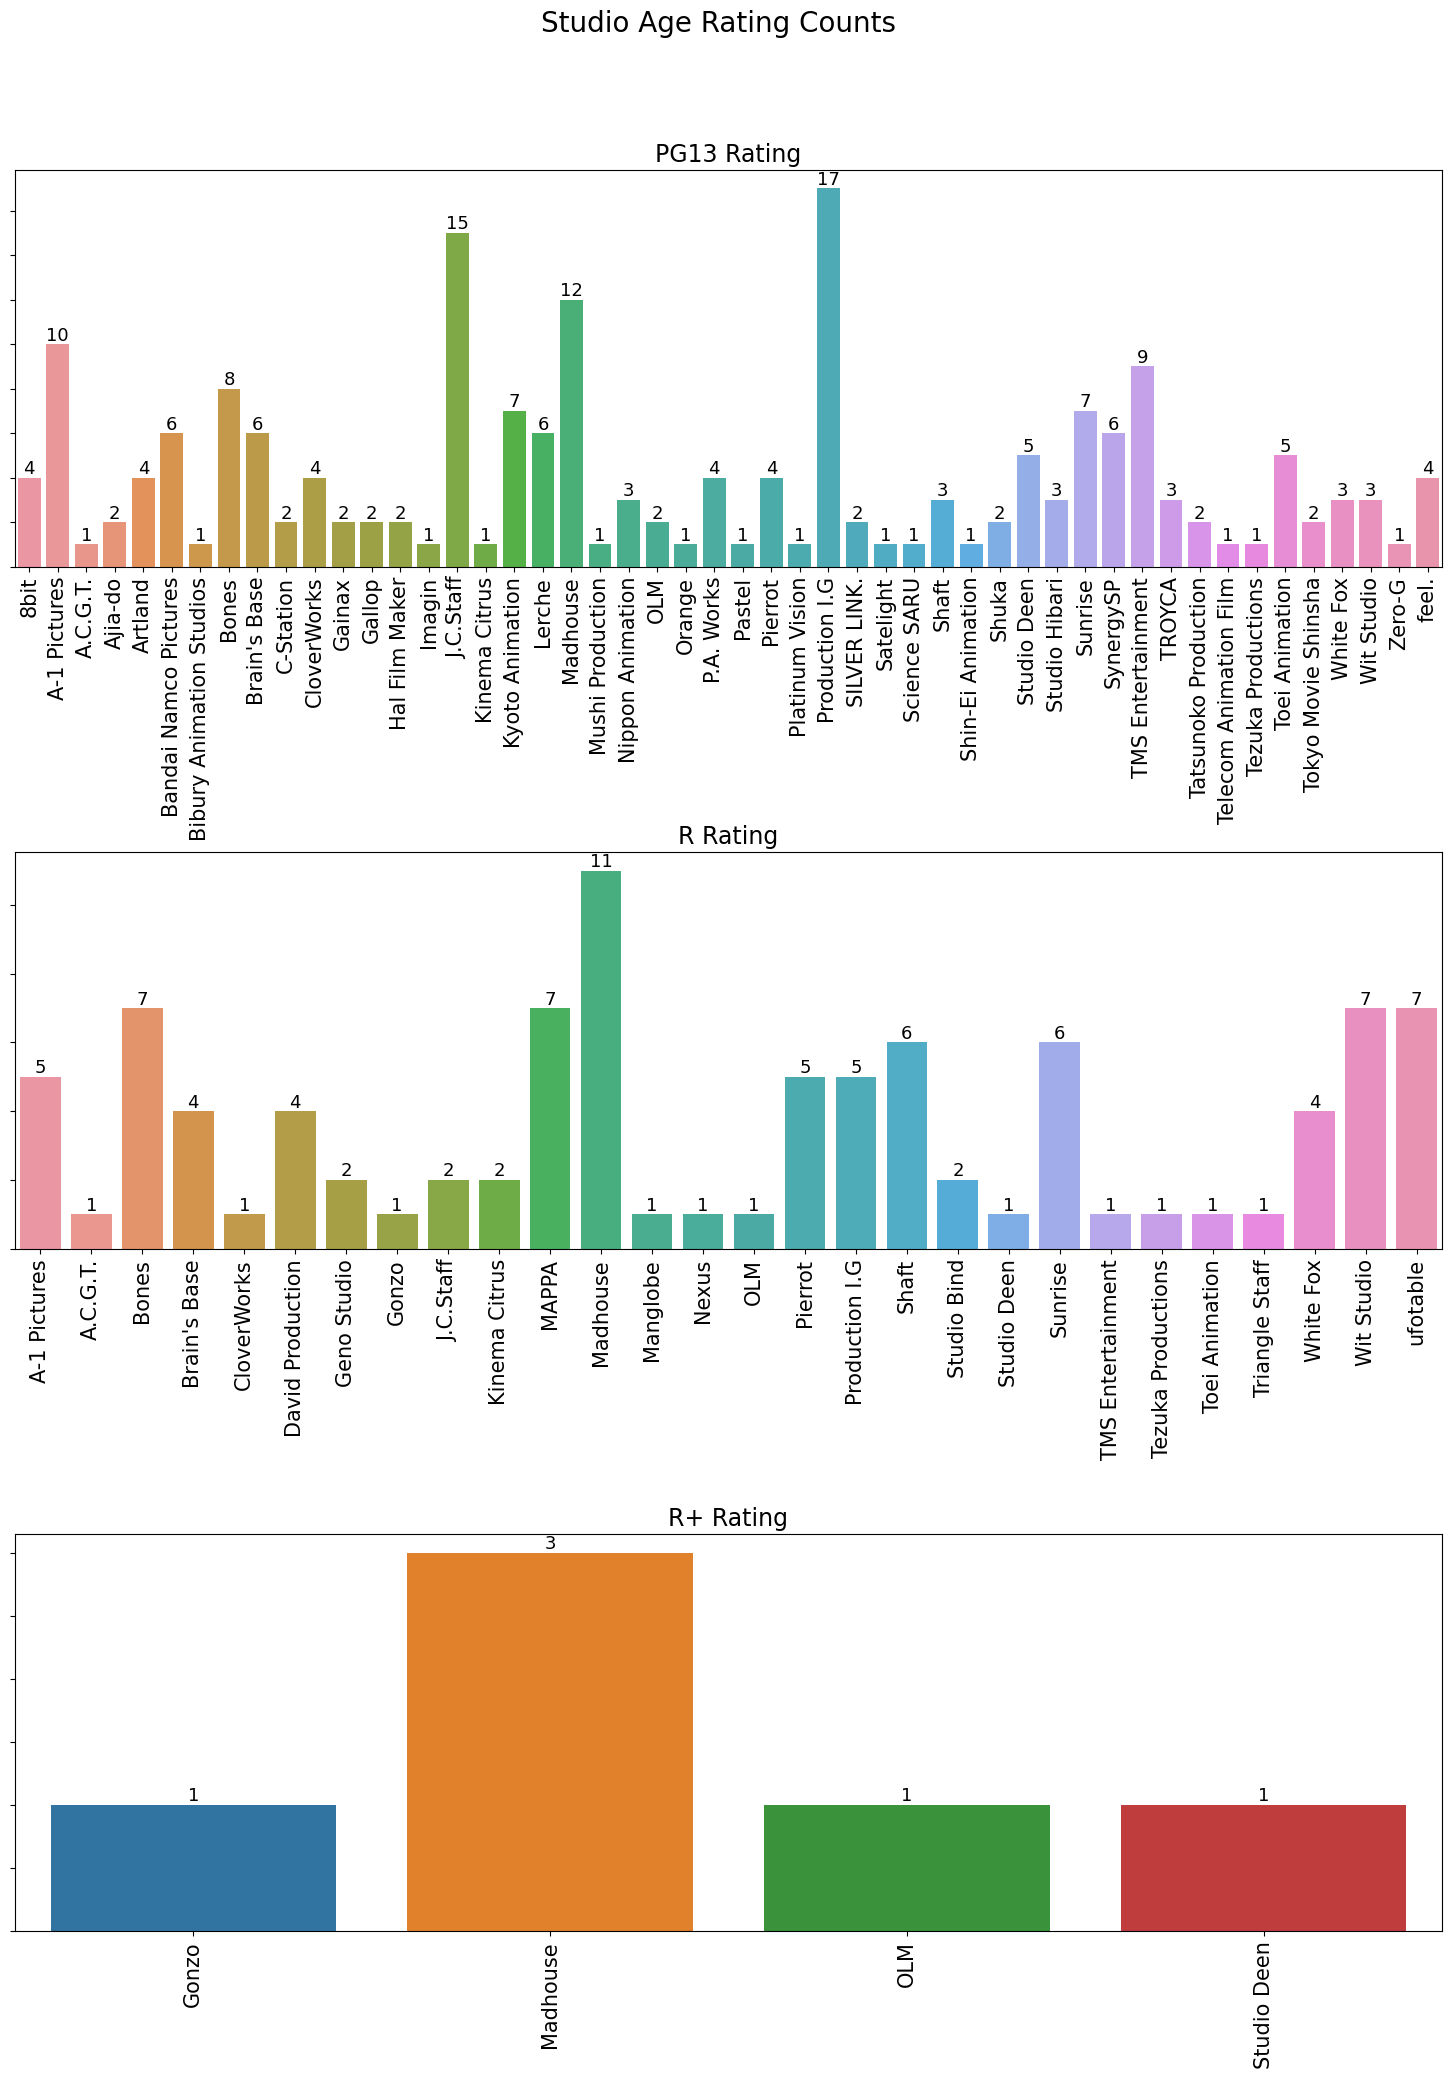

In [128]:
fig, ax = plt.subplots(3,1, figsize=(15,20))
fig.suptitle('Studio Age Rating Counts', fontsize = 20)
fig.tight_layout(h_pad=20)
fig.subplots_adjust(top = .9)


## Defining each subplot
# sns.barplot(ax= ax[0], 
#             x = g_studios.index,
#             y = g_studios.values)

# sns.barplot(ax= ax[1], 
#             x = pg_studios.index,
#             y = pg_studios.values)

sns.barplot(ax= ax[0], 
            x = pg13_studios.index,
            y = pg13_studios.values)

sns.barplot(ax= ax[1], 
            x = r_studios.index,
            y = r_studios.values)

sns.barplot(ax= ax[2], 
            x = rPlus_studios.index,
            y = rPlus_studios.values)

for i in ax:
    i.tick_params(labelsize = 15, rotation = 90)
    i.set_xlabel(' ')
    i.set(yticklabels =[])          # Removes ylable data

    # Puts value numbers ontop graph bars
    for container in i.containers:
        i.bar_label(container, fontsize = 13)


ax[0].set_title('PG13 Rating',  fontsize = 17)
ax[1].set_title('R Rating',     fontsize = 17)
ax[2].set_title('R+ Rating',    fontsize = 17)


# plt.show()



plt.savefig(save_path+'/Age_Ratings/age_ratings_count.png',
            transparent = False,
            bbox_inches = 'tight'
            )

In [ ]:
# strudio_age


# sns.barplot(x = s_age.index,
#             y = s_age.values)

In [ ]:
# mask = (dataTV['Studio'].str.contains('Bones') & dataTV['Age Ratingn'].str.contains('PG-13'))

# dataTV[mask]

In [ ]:
# mask = (dataTV['Title'].str.contains('Boku no Hero'))
# mask = (dataTV['Title'].str.contains('Shingeki no Kyo'))
# mask = (dataTV['Title'].str.contains('Code'))

# # data[mask]

# dataTV[mask]#'Rating'].mean()

#### &emsp; Age Rating

#### &emsp; Genres

#### &emsp; Producers

#### &emsp; Demograph

#### &emsp; Themes

#### &emsp; Source

-----
----
### ___Generes___

Fix after running other code again

In [129]:
genreNames = ['Action', 'Adventure', 'Avant Garde', 'Award Winning','Boys Love', 'Comedy', 
              'Drama', 'Ecchi', 'Fantasy', 'Gourmet', 'Horror', 'Mystery', 'Romance',
              'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense']

# len(genreNames)

#### &emsp; Counts

In [132]:
genList = []
for genre in genreNames:
    genreLen = (dataTV['Genres'].str.contains(genre)).sum()

    genList.append(genreLen)


    print(f'Number of items in {genre}: ', genreLen)

Number of items in Action:  110
Number of items in Adventure:  59
Number of items in Avant Garde:  2
Number of items in Award Winning:  24
Number of items in Boys Love:  2
Number of items in Comedy:  93
Number of items in Drama:  106
Number of items in Ecchi:  8
Number of items in Fantasy:  62
Number of items in Gourmet:  2
Number of items in Horror:  4
Number of items in Mystery:  44
Number of items in Romance:  47
Number of items in Sci-Fi:  50
Number of items in Slice of Life:  28
Number of items in Sports:  35
Number of items in Supernatural:  60
Number of items in Suspense:  27


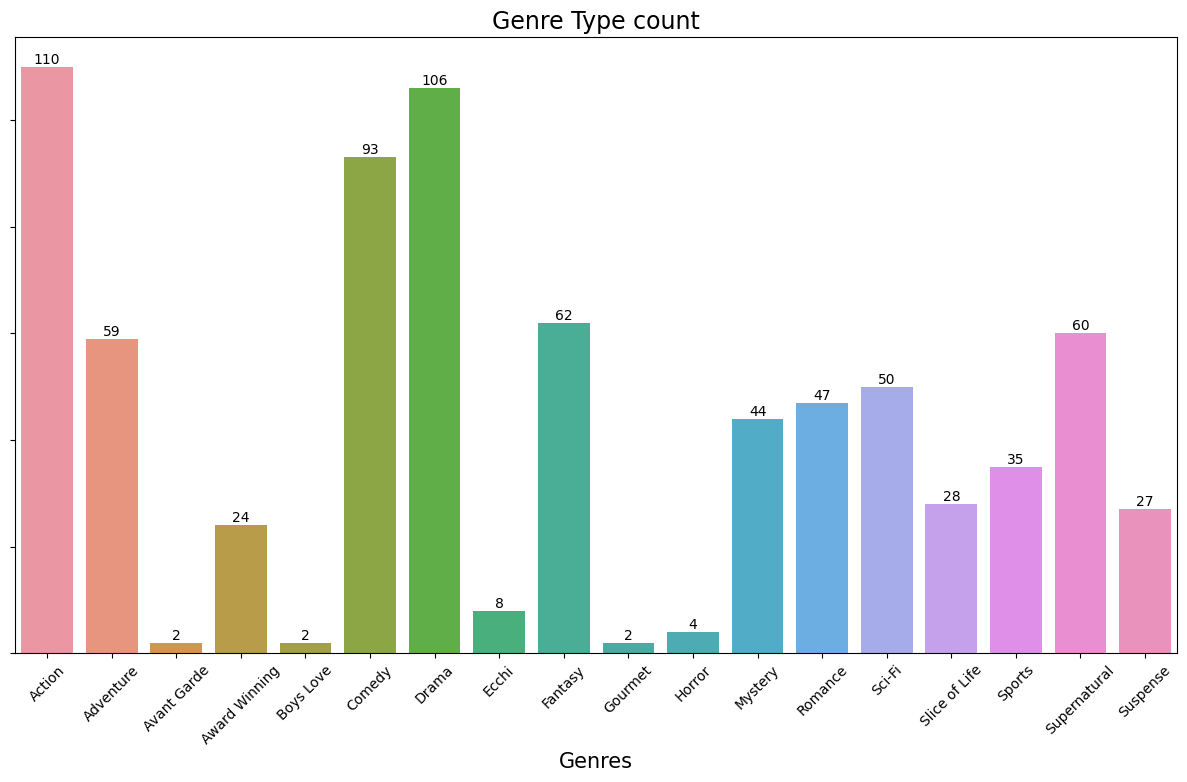

In [145]:
plt.figure(figsize = (15,8))


ax = sns.barplot(x= genreNames,
                 y = genList
                 )


ax.set_title('Genre Type count', fontsize = 17)
ax.tick_params(axis ='x', 
               rotation = 45)

ax.set_xlabel("Genres", fontsize =15)
# ax.set_ylabel("Count", fontsize =15)
ax.set_yticklabels([])



for container in ax.containers:
    ax.bar_label(container)



plt.savefig(save_path+'/Genres/all_count.png',
            transparent = False,
            bbox_inches = 'tight'
            )

###### Delete this Draft

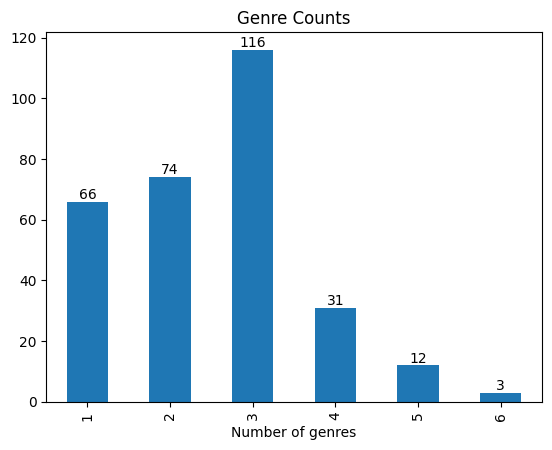

In [140]:
genreList = ((dataTV.Genres).str.split("'").str[1::2])

ax = genreList.str.len().value_counts().sort_index().plot.bar(legend = False)
ax.set_title('Genre Counts')
ax.set_xlabel('Number of genres')
# ax.grid('on', axis = 'y' )
# ax.bar_label(ax.containers[1])

# ax.xl

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
# actionList = []
# adventureList = []
# awardWList = []
# avantGrandeList = []

# lenList = []

# # for index, value in enumerate(genreNames):
# for index, value in enumerate(genreList):
#     # print(index,str(value))

#     action_Sum      = (str(value.__contains__(genreNames[0]))).count('True')
#     adventure_Sum   = (str(value.__contains__(genreNames[1]))).count('True')
#     avantGarde_Sum  = (str(value.__contains__(genreNames[2]))).count('True')
#     awardW_Sum      = (str(value.__contains__(genreNames[3]))).count('True')



#     (actionList.append(action_Sum))
#     (adventureList.append(adventure_Sum))
#     (avantGrandeList.append(avantGarde_Sum))
#     (awardWList.append(awardW_Sum))


#     lenList.append([actionList.count, adventureList])

#     # print('test', comedySum)  


# print(genreNames[0],'\t len:',sum(actionList))
# print(genreNames[1],'\t len:',sum(adventureList))
# print(genreNames[2],'\t len:',sum(avantGrandeList))
# print(genreNames[3],'\t len:',sum(awardWList))


# print('Testing len:', (lenList[0]))

In [ ]:
testlist =[]

# genreNames = genreNames
for i in genreList:

    for j in dataTV.Genres:

        test = j.__contains__(str(i))
    
        # testlist.append(test)

        # test = (j.__contains__(i))
    
        print(test)


# print((testlist))


In [ ]:
# dataTV['Action_TF'] = str(genreList.values[2])

# dataTV.Action_TF


# dataTV.groupby(['Themes'][0])['Themes'].count()


In [ ]:
(genreList.values[2]).__contains__('Suspense')

In [ ]:
# dataTV['Genres'].str.contains('Action').sum()

genreNames

#### &emsp; Broadcast

#### &emsp; Studio

#### &emsp; Age Rating

#### &emsp; Genres

#### &emsp; Producers

#### &emsp; Demograph

#### &emsp; Themes

#### &emsp; Source

----
-----
### ___Producers___

#### &emsp; Count

In [ ]:
dataTV.Producer.value_counts()[:20].plot(kind='bar', figsize=(15,5), grid=True)

#### &emsp; Premiered

#### &emsp; Broadcast


#### &emsp; Studio

#### &emsp; Age Rating


#### &emsp; Genres


#### &emsp; Producers


#### &emsp; Demograph



#### &emsp; Themes


#### &emsp; Source

-----
------
### ___Demograph___

#### &emsp; Count


In [146]:
uniqueDemo = ['Josei', 'Kids', 'Seinen', 'Shoujo', 'Shounen'] 

In [178]:
demograph_group = dataTV.groupby(dataTV['Demograph'])
demograph_count = demograph_group['Demograph'].count()

demograph_count

Demograph
Josei       12
Kids         1
None       110
Seinen      51
Shoujo      17
Shounen    111
Name: Demograph, dtype: int64

In [55]:
# demograph_group.first()

#### &emsp;  demo Count

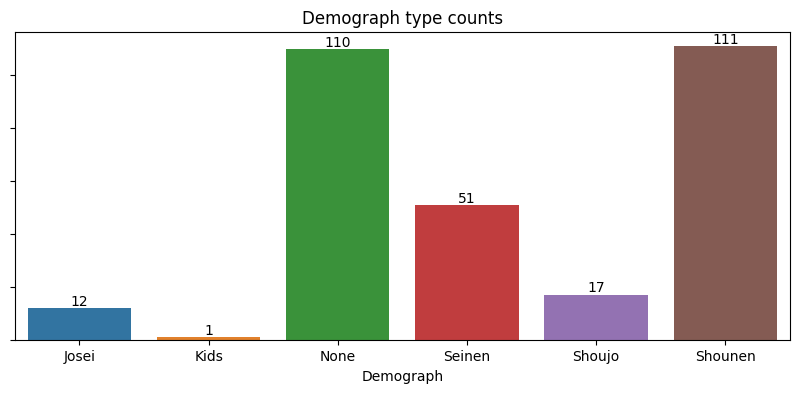

In [179]:
# ax = demograph_count.plot.bar()

plt.figure(figsize=(10,4))

ax = sns.barplot(x = demograph_count.index,
                 y = demograph_count.values)

ax.set_title('Demograph type counts')
ax.set_yticklabels('')
 


for container in ax.containers:
    ax.bar_label(container)



plt.savefig(save_path+'/Demograph/demograph_count.png',
            transparent = False,
            bbox_inches = 'tight'
            )


#### &emsp; Premaired



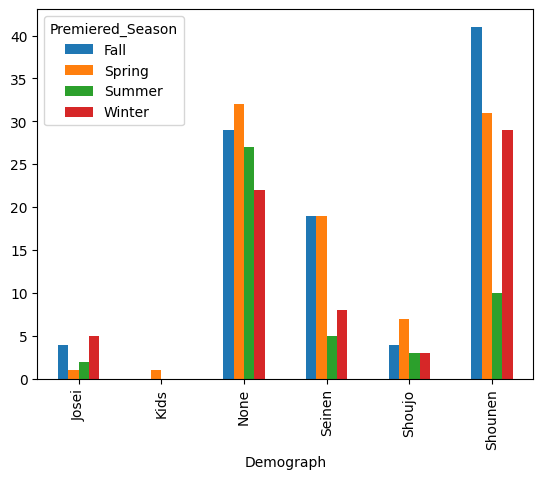

In [679]:
demo_season = demograph_group['Premiered_Season'].value_counts().unstack(fill_value=0)

# ax = sns.barplot(x = demo_season,
#                  y = demo_season.values)

demo_season.plot.bar()

plt.savefig(save_path+'/Demograph/demograph_season.png',
            transparent = False,
            bbox_inches = 'tight'
            )


#### &emsp; Broadcast

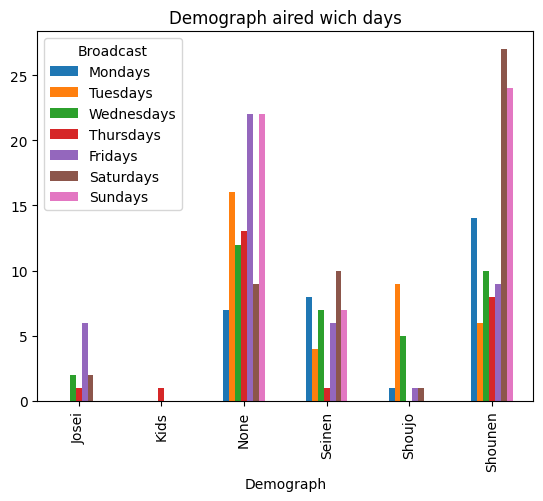

In [540]:
demo_broad_count =demograph_group['Broadcast'].value_counts().unstack()
demo_broad_count = demo_broad_count[date_order]


ax = demo_broad_count.plot.bar()

ax.set_title('Demograph aired wich days')


plt.savefig(save_path+'/Demograph/demo_broadcast.png',
            transparent = False,
            bbox_inches = 'tight'
            )

In [509]:
demograph_group.first()

,Rank,Title,Rating,Type,AirDate_dt,EndDate_dt,TotalEpi,Members,MAL Ref,Status,Premiered,Broadcast,Studio,Duration,Age Ratingn,Genres,Producer,Themes,Source,Premiered_Season
Demograph,,,,,,,,,,,,,,,,,,,,
Josei,44,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,8.73,TV,2017-01-01,2017-03-01,12,177753,33095,Finished Airing,Winter 2017,Saturdays,Studio Deen,24,PG-13,['Drama'],Mainichi Broadcasting System,"['Adult Cast', 'Historical', 'Love Polygon', '...",Manga,Winter
Kids,340,Tanoshii Muumin Ikka,8.21,TV,1990-04-01,1991-10-01,78,24753,2150,Finished Airing,Spring 1990,Thursdays,Telescreen,24,G,"['Adventure', 'Comedy', 'Fantasy', 'Slice of L...",TV Tokyo,['Iyashikei'],Book,Spring
None,4,Steins;Gate,9.08,TV,2011-04-01,2011-09-01,24,2387240,9253,Finished Airing,Spring 2011,Wednesdays,White Fox,24,PG-13,"['Drama', 'Sci-Fi', 'Suspense']",Frontier Works,"['Psychological', 'Time Travel']",Visual novel,Spring
Seinen,6,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.07,TV,2022-04-01,2022-06-01,13,764873,43608,Finished Airing,Spring 2022,Saturdays,A-1 Pictures,23,PG-13,"['Comedy', 'Romance']",Aniplex,['School'],Manga,Spring
Shoujo,13,Fruits Basket: The Final,9.01,TV,2021-04-01,2021-06-01,13,410330,42938,Finished Airing,Spring 2021,Tuesdays,TMS Entertainment,23,PG-13,"['Drama', 'Romance', 'Supernatural']",TV Tokyo,['None'],Manga,Spring
Shounen,2,Fullmetal Alchemist: Brotherhood,9.11,TV,2009-04-01,2010-07-01,64,3100193,5114,Finished Airing,Spring 2009,Sundays,Bones,24,R,"['Action', 'Adventure', 'Drama', 'Fantasy']",Aniplex,['Military'],Manga,Spring


#### &emsp;  Studio

In [652]:
demo_studio =  demograph_group['Studio'].value_counts().unstack(fill_value=0, level=0)


# demo_studio[demo_studio.values >5]

In [656]:
# demo_studio.plot.bar(figsize = (15,8))
# demo_studio.stack()

#### &emsp;  Age Rating

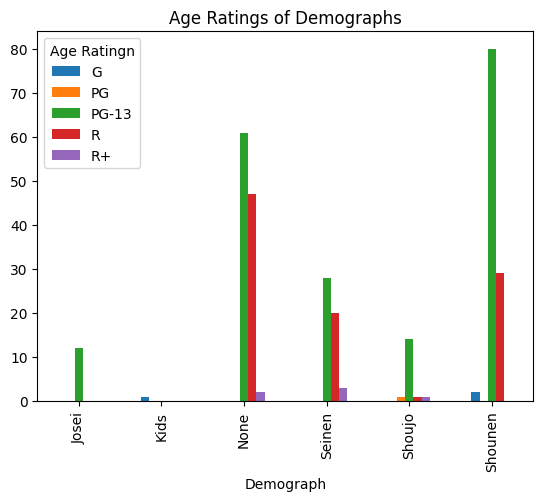

In [680]:
demograph_age_count = demograph_group['Age Ratingn'].value_counts().unstack()

ax = demograph_age_count.plot.bar()
ax.set_title('Age Ratings of Demographs')

plt.savefig(save_path+'/Demograph/demograph_ageRating.png',
            transparent = False,
            bbox_inches = 'tight'
            )



# pivot = pd.pivot_table(data=dataTV,
#                index='Demograph', 
#                columns = 'Age Ratingn',
#                aggfunc='count',
#                fill_value=0)['Type']

# pivot

# ax = pivot.plot.bar()

#### &emsp;  Producers

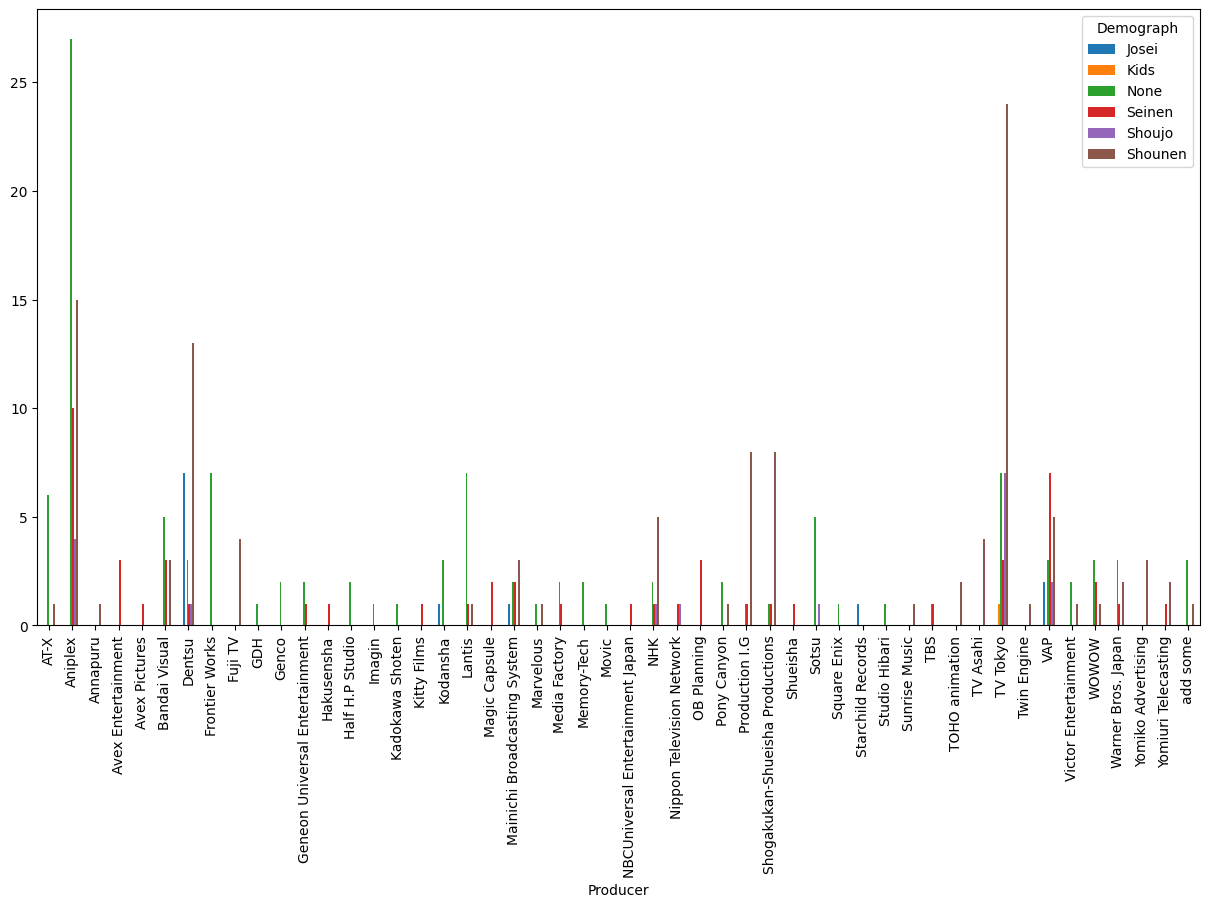

In [581]:
test =demograph_group['Producer'].value_counts().unstack(level=0, fill_value=0)#.plot.bar(figsize = (15,5))


test.plot.bar(figsize = (15,8))

plt.savefig(save_path+'/Demograph/demo_producer.png',
            transparent = False,
            bbox_inches = 'tight'
            )


In [621]:
more_5 = test[test.values > 5].drop_duplicates()
less_5 = test[test.values < 5].drop_duplicates()



In [622]:
# fig, ax = plt.subplots(1,2)

# sns.barplot(ax = ax[0],
#             data = more_5)

#### &emsp; Theme

In [682]:
demograph_group['Themes'].value_counts()

Demograph  Themes                                                         
Josei      ['Adult Cast', 'Music']                                            3
           ['Love Polygon', 'School', 'Strategy Game']                        3
           ['Adult Cast', 'Historical', 'Love Polygon', 'Performing Arts']    1
           ['Adult Cast', 'Love Polygon', 'Visual Arts']                      1
           ['Childcare', 'Iyashikei']                                         1
                                                                             ..
Shounen    ['Romantic Subtext', 'School']                                     1
           ['School', 'Strategy Game']                                        1
           ['Space', 'Survival']                                              1
           ['Time Travel']                                                    1
           []                                                                 1
Name: Themes, Length: 155, dtype: int64

#### &emsp; Source

#### Small details

In [ ]:
demo_airing_or_finish = demograph_group['Status'].value_counts().unstack(fill_value=0)


----
------
### ___Themes___

#### tets

In [180]:
uniqueThemes = ['Adult Cast', 'Anthropomorphic', 'CGDCT', 'Childcare', 'Combat Sports',    
                'Crossdressing', 'Delinquents', 'Detective', 'Educational', 'Gag Humor',     
                'Gore','Harem', 'High Stakes Game', 'Historical', 'Idols', 'Isekai', 'Iyashikei', 'Love Polygon', 'Magical Sex Shift',     
                'Mahou Shoujo' , 'Martial Arts', 'Mecha', 'Medical', 'Military',     'Music',    
                'Mythology','Organized Crime','Otaku Culture', 'Parody', 'Performing Arts',     
                'Pets', 'Psychological', 'Racing','Reincarnation', 'Reverse Harem',     
                'Romantic Subtex', 'Samurai', 'School', 'Showbiz', 'Space', 'Strategy Game', 
                'Super Power','Survival', 'Team Sports', 'Time Travel', 'Vampire',     
                'Video Game', 'Visual Arts', 'Workplace']

In [ ]:
# len(uniqueThemes)

In [264]:
themeLen = []

for themes in uniqueThemes:
    themeSum = (dataTV['Themes'].str.contains(themes)).sum()

    themeLen.append(themeSum)

    # print(f'Number of items in {themes}: ', themeSum)


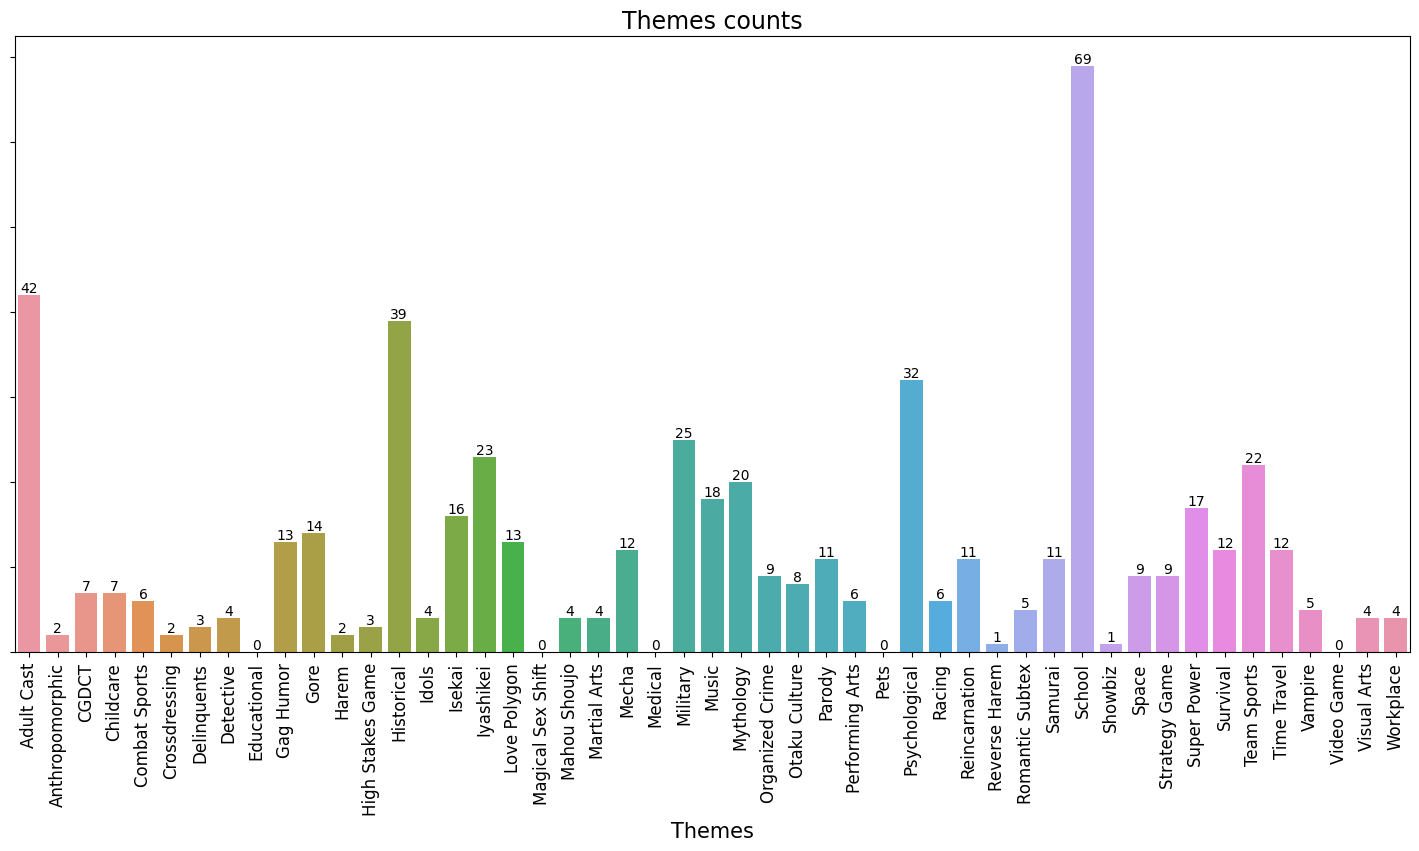

In [309]:
plt.figure(figsize=(18,8))

ax = sns.barplot(x = uniqueThemes,
                 y = themeLen)

ax.set_title('Themes counts', fontsize = 17)
ax.set_xlabel('Themes',  fontsize = 15)
ax.set_xticklabels(labels = uniqueThemes, fontsize = 12)

ax.set_yticklabels([])

ax.tick_params(axis='x', 
               rotation = 90)

for container in ax.containers:
    ax.bar_label(container)


plt.savefig(save_path+'/Themes/theme_count.png',
            transparent = False,
            bbox_inches = 'tight'
            )

In [301]:
# TODO: #6 Plot smaller graphs, for less greater than 10 count

# (themeLen.unstack(level=1)['G'].dropna()).astype(int)

# dataTV.Themes.str.contains(uniqueThemes).count()
# uniqueThemes

# list(filter(lambda x: x>10, themeLen))


##### Meh

In [ ]:
# dataTV['themeList'] = ((dataTV.Themes).str.split("'"))

dataTV['themeList'] = ((dataTV.Themes).str.split("'").str[1::2])

# counts number of indexes
# dataTV.themeList.str.len()


# # Counts number cointaining certain number of themes
# # 121 entries have 1 themes
# # 101 enreies have 2 themes
# # 63 enreies have 3 themes
# # 16 enreies have 4 themes

((dataTV.Themes).str.split("'").str[1::2]).str.len().value_counts()


In [ ]:
# ((dataTV.Themes[8]).split("'")[1::2])

((dataTV.themeList)).sort_values()

In [ ]:
# themes_group = dataTV.groupby(dataTV['Themes'])   ## The original colom
themes_group = dataTV.groupby(dataTV['themeList'])

In [ ]:
themes_group

In [ ]:
# (dataTV.themeList)[:5].value_counts()
(dataTV.themeList).loc[:5]

In [185]:
# Counts each adult cast occurance
dataTV.Themes.str.count('Adult Cast').sum()
dataTV.Themes.str.count('Childcare').sum()



7

In [ ]:
((dataTV.Themes).str.split("'").str[1::2]).str

#### &emsp; Premiered

#### &emsp; Broadcast

#### &emsp; Studio

#### &emsp; Age Rating


#### &emsp; Genres


#### &emsp; Producers


#### &emsp; Demograph



#### &emsp; Themes


#### &emsp; Source

------
------
### ___Source___

In [340]:
source_group = dataTV.groupby('Source')
source_count = source_group['Source'].count()

source_count.index

# demograph_group = dataTV.groupby(dataTV['Demograph'])
# demograph_count = demograph_group['Demograph'].count()

# demograph_count

Index(['4-koma manga', 'Book', 'Game', 'Light novel', 'Manga', 'Novel',
       'Original', 'Visual novel', 'Web manga'],
      dtype='object', name='Source')

#### &emsp; Counts

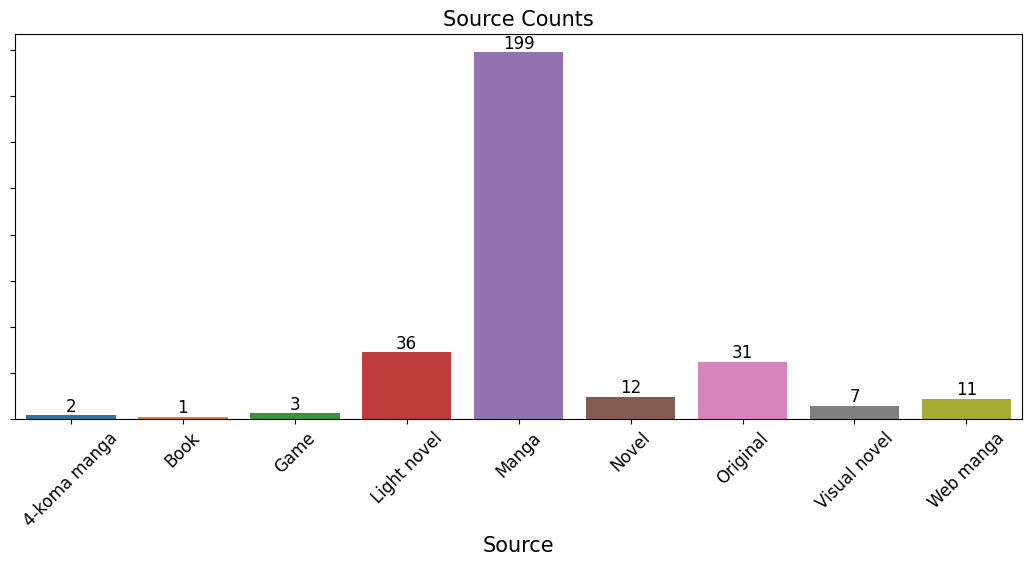

In [343]:
plt.figure(figsize=(13,5))

ax = sns.barplot(x = source_count.index,
                 y = source_count.values)


ax.set_title('Source Counts', fontsize = 15)
ax.set_xlabel('Source', fontsize = 15)

ax.set_xticklabels(labels = source_count.index, fontsize = 12)
ax.set_yticklabels([])
ax.tick_params(axis='x', 
               rotation = 45)

for container in ax.containers:
    ax.bar_label(container, fontsize = 12)


plt.savefig(save_path+'/Source/source_count.png',
            transparent = False,
            bbox_inches = 'tight'
            )

#### &emsp; Premiered

#### &emsp; Studio

#### &emsp; Age Rating

In [403]:
source_age = source_group['Age Ratingn'].value_counts().unstack(level=0).replace(np.nan, 0)

source_age

Source,4-koma manga,Book,Game,Light novel,Manga,Novel,Original,Visual novel,Web manga
Age Ratingn,,,,,,,,,
G,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
PG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
PG-13,2.0,0.0,3.0,14.0,142.0,8.0,14.0,4.0,8.0
R,0.0,0.0,0.0,22.0,50.0,3.0,16.0,3.0,3.0
R+,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0


Text(0.5, 1.0, 'Source Age ratings count')

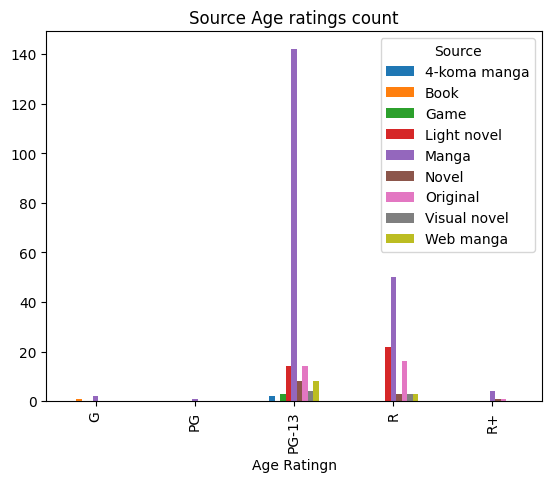

In [468]:
ax = source_age.plot.bar()

ax.set_title('Source Age ratings count')

# sns.barplot(x = source_age.ind)

<Axes: xlabel='Source'>

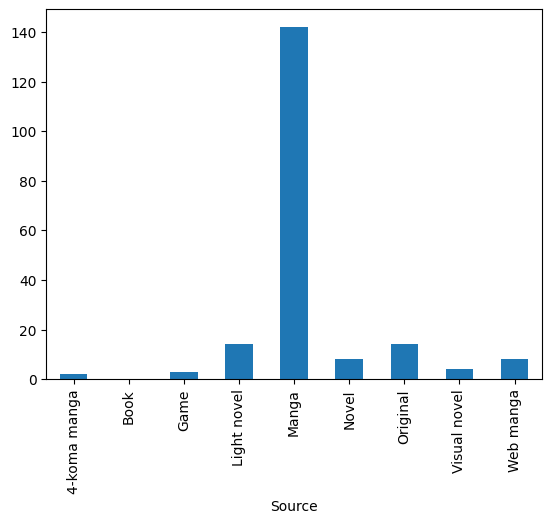

In [467]:
## Zoombed in of above graph

pg13_source_age  = source_age.loc['PG-13']
rPlus_source_age = source_age.loc['R+']

pg13_source_age.plot.bar()

In [405]:
# source_group['Age Ratingn'].value_counts().unstack().plot.bar()
# source_group['Age Ratingn'].value_counts().unstack()['PG-13']

<Axes: xlabel='Demograph'>

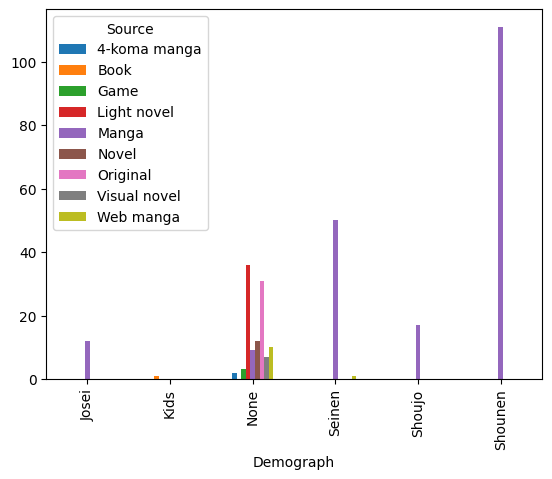

In [427]:
source_group['Demograph'].value_counts().unstack()#.plot.bar()
source_group['Demograph'].value_counts().unstack(level=0).plot.bar()

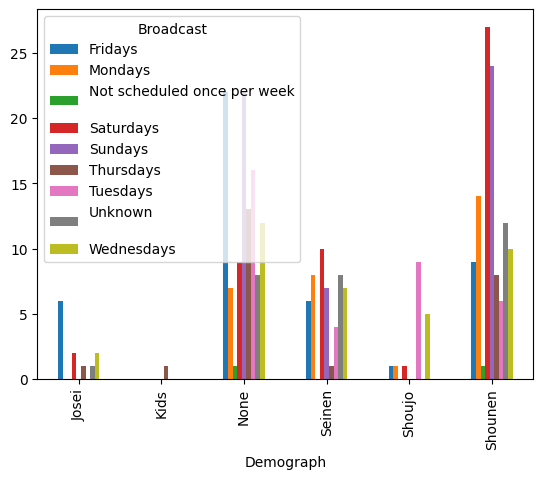

In [493]:
pivot = pd.pivot_table(data=dataTV,
               index='Demograph', 
               columns = 'Broadcast',
               aggfunc='count',
               fill_value=0)['Type']

pivot

ax = pivot.plot.bar()
# ax.legend(False)

#### &emsp; Genres

#### &emsp; Producers

#### &emsp; Demograph

#### &emsp; Themes

#### &emsp; Studio

----
-----
----
## Only Movies

In [ ]:
data.loc[data.Type == 'Movie']
